<h1><b> CASE PROJECT <b></h1>

In [63]:
data <- read.csv("./data/Case_GDP-round2.csv")
names(data)[1] <- "Date"
data$year <- substr(data$Date, 1, 4)

In [64]:
n <- nrow(data)

for (i in c(1:2)){
    data[,paste("li1_l", i, sep="")] <- c(c(rep(NA, i)), data$li1[-((n-i+1):n)])
}
for (i in c(1:2)){
    data[,paste("li2_l", i, sep="")] <- c(c(rep(NA, i)), data$li2[-((n-i+1):n)])
}

data$GrowthRate_l1 <- c(c(rep(NA, 1)), data$GrowthRate[-((n-0):n)])

train <- subset(data, data$year <= 2010 & data$year > 1950)
val <- subset(data, data$year > 2010)

<br><br>
<h2><b>Part (a)</b> </h2>

In [65]:
LL0 <- -152.763

(1) GDPIMPR = $\alpha + \beta_1 \text{li1(-1)} + \varepsilon$

In [66]:
m <- 1
LL1 <- -139.747
LR <- -2*(LL0 - LL1)
critval <- qchisq(0.95, df=m, lower.tail=TRUE)
sprintf("LR = %.3f > %.3f, therefore reject H0. Full model is preferred.", LR, critval)

[1] "LR = 26.032 > 3.841, therefore reject H0. Full model is preferred."

(2) GDPIMPR = $\alpha + \beta_ \text{li2(-1)} + \varepsilon$

In [67]:
m <- 1
LL1 <- -149.521
LR <- -2*(LL0 - LL1)
critval <- qchisq(0.95, df=m, lower.tail=TRUE)
sprintf("LR = %.3f > %.3f, therefore reject H0. Full model is preferred.", LR, critval)

[1] "LR = 6.484 > 3.841, therefore reject H0. Full model is preferred."

(3) GDPIMPR = $\alpha + \beta_1 \text{li2(-1)} + \beta_2 \text{li2(-1)} + \varepsilon$

In [68]:
m <- 2
LL3 <- -134.178
LR <- -2*(LL0 - LL3)
pval <- pchisq(LR, df=m, lower.tail=FALSE)
critval <- qchisq(0.95, df=m, lower.tail=TRUE)
sprintf("LR = %.3f > %.3f, therefore reject H0. Full model is preferred.", LR, critval)

[1] "LR = 37.170 > 5.991, therefore reject H0. Full model is preferred."

<br><br>
<h2><b> Part (b) </b></h2>

We can use McFadden because the dependent variable for the four models are the same, GDPIMR.

In [69]:
Lb1 <- -152.763

(1) GDPIMPR = $\alpha + \beta_1 \text{li2(-1)} + \beta_3 \text{li2(-1)} + \varepsilon$

In [70]:
Lb <- -134.178
R.squared <- 1 - Lb/Lb1
sprintf("McFadden R.squared = %.4f", R.squared)

[1] "McFadden R.squared = 0.1217"

(2) GDPIMPR = $\alpha + \beta_1 \text{li2(-1)} + \beta_4 \text{li2(-2)} + \varepsilon$

In [71]:
Lb <- -134.126
R.squared <- 1 - Lb/Lb1
sprintf("McFadden R.squared = %.4f", R.squared)

[1] "McFadden R.squared = 0.1220"

(3) GDPIMPR = $\alpha + \beta_2 \text{li1(-2)} + \beta_3 \text{li2(-1)} + \varepsilon$

In [72]:
Lb <- -130.346
R.squared <- 1 - Lb/Lb1
sprintf("McFadden R.squared = %.4f", R.squared)

[1] "McFadden R.squared = 0.1467"

(4) GDPIMPR = $\alpha + \beta_2 \text{li1(-2)} + \beta_4 \text{li2(-2)} + \varepsilon$

In [73]:
Lb <- -130.461
R.squared <- 1 - Lb/Lb1
sprintf("McFadden R.squared = %.4f", R.squared)

[1] "McFadden R.squared = 0.1460"

Best model is the third one (GDPIMR = $\alpha + \beta_2 \text{li1(-2)} + \beta_3 \text{li2(-1)} + \varepsilon$) with the highest McFadden $R^2$ value of 0.1467.


<br><br>
<h2><b> Part (c) </b></h2>

In [74]:
model3 <- glm(GDPIMPR ~ li1_l2 + li2_l1, data=train, family="binomial")

In [75]:
result <- data.frame(val[, c("GDPIMPR")])
names(result)[1] <- "actual"
result$actual <- as.factor(as.logical((result$actual)))
result$pred <- predict(model3, newdata=val, type="response")
result$pred <- as.factor((result$pred > 0.5))

In [76]:
cm <- confusionMatrix(result$pred, result$actual)
cm$table
sprintf("Hit rate = %.2f", cm$overall["Accuracy"])

          Reference
Prediction FALSE TRUE
     FALSE     5    3
     TRUE      2   10

[1] "Hit rate = 0.75"

The model's performance in the out-of-sample data is relatively accurate at 75% hit rate. As we use data from a relatively long period of time, the model might be mixing up older and newer fundamental characteristic in the relationship between the variable, hence the accuracy is limited.

<br><br>
<h2><b> Part (d) </b></h2>

In [87]:
ADF <- lm(GrowthRate ~ T + LOGGDP + GrowthRate_l1, data=train)
est <- summary(ADF)$coefficient[2, "Estimate"]
stder <- summary(ADF)$coefficient[2, "Std. Error"]
tval <- summary(ADF)$coefficient[2, "t value"]


sprintf("Formula: GrowthRate = %.3f + %.3f*T - %.3f*LOGGDP + %.3f*GrowthRate_l1", coef(ADF)[1], coef(ADF)[2], -1*coef(ADF)[3], coef(ADF)[4])

sprintf("Coefficient = %.5f", est)
sprintf("Std. Error = %.5f", stder)
sprintf("t-value = %.5f > -3.5. Do not reject H0. LOGGDP is non stationary.", tval)

[1] "Formula: GrowthRate = 0.017 + 0.000*T - 0.003*LOGGDP + 0.606*GrowthRate_l1"

[1] "Coefficient = 0.00001"

[1] "Std. Error = 0.00003"

[1] "t-value = 0.46742 > -3.5. Do not reject H0. LOGGDP is non stationary."

<br><br>
<h2><b>Part (e)</b></h2>

$k_1 = 1, k_2 = 1$

In [101]:
fit1 <- lm(GrowthRate ~ GrowthRate_l1 + li1_l1 + li2_l1, data=train)
r.squared <- summary(fit1)$r.squared
sprintf("R.squared = %.6f (Highest)", r.squared)
sprintf("Coefficients")
print(round(summary(fit1)$coefficient[,"Estimate"],6))

[1] "R.squared = 0.507975 (Highest)"

[1] "Coefficients"

  (Intercept) GrowthRate_l1        li1_l1        li2_l1 
     0.001737      0.461579     -0.001023     -0.000149 


$k_1 = 1, k_2 = 2$

In [91]:
fit <- lm(GrowthRate ~ GrowthRate_l1 + li1_l1 + li2_l2, data=train)
r.squared <- summary(fit)$r.squared
sprintf("R.squared = %.6f", r.squared)

[1] "R.squared = 0.507665"

$k_1 = 2, k_2 = 1$

In [92]:
fit <- lm(GrowthRate ~ GrowthRate_l1 + li1_l2 + li2_l1, data=train)
r.squared <- summary(fit)$r.squared
sprintf("R.squared = %.6f", r.squared)

[1] "R.squared = 0.477193"

$k_1 = 2, k_2 = 2$

In [93]:
fit <- lm(GrowthRate ~ GrowthRate_l1 + li1_l2 + li2_l2, data=train)
r.squared <- summary(fit)$r.squared
sprintf("R.squared = %.6f", r.squared)

[1] "R.squared = 0.477130"

<br><br>
<h2><b> Part (f)</b> </h2>

In [129]:
residuals <- train
n <- nrow(residuals)
residuals$e <- summary(fit1)$residuals
residuals$e_l1 <- c(c(rep(NA, 1)), residuals$e[-((n-0):n)])
BG_model <- lm(e ~ GrowthRate_l1 + li1_l2 + li2_l2 + e_l1, data=residuals)
R.squared <- summary(BG_model)$r.squared
BG <- n*R.squared
critval <- qchisq(0.95, df=1, lower.tail=TRUE)
sprintf("BG = %.3f < %.3f, therefore there does not seem to be any misspecification of the model.", BG, critval)

[1] "BG = 0.575 < 3.841, therefore there does not seem to be any misspecification of the model."

<br><br>
<h2><b> Part (g)</b> </h2>

In [126]:
result <- val
result$pred <- predict(fit1, newdata=result)
result$e <- result$GrowthRate - result$pred
RMSE <- sqrt(1/n*sum(result$e**2))
sprintf("RMSE=%.6f", RMSE)

[1] "RMSE=0.000911"

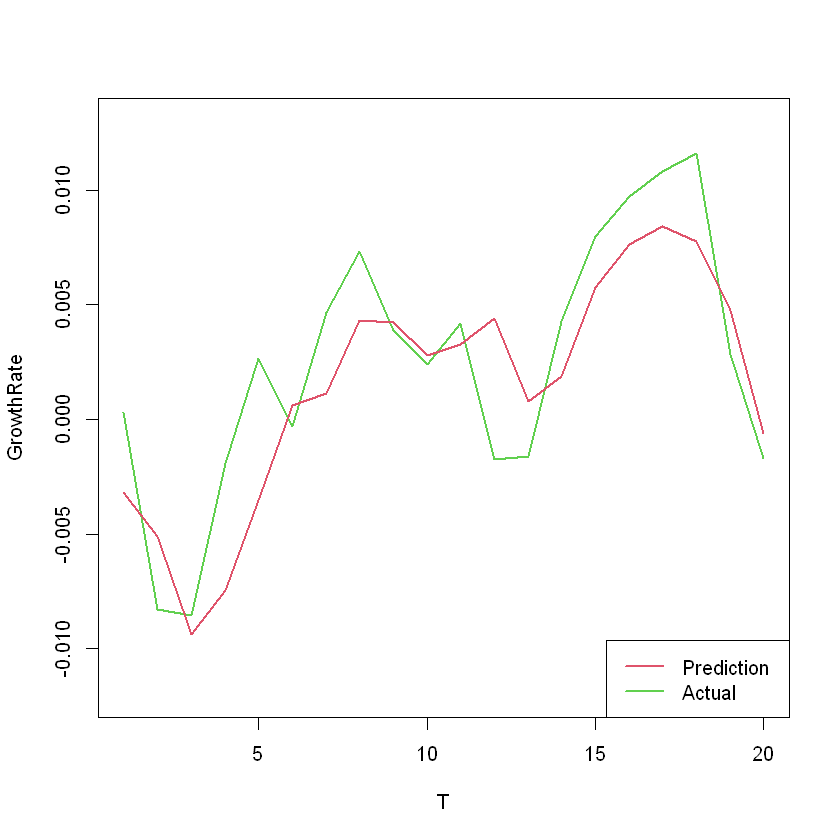

In [158]:
plot(result$GrowthRate, ylab="GrowthRate", ylim=c(-0.012, 0.013), xlab="T",type="l", col=3, lwd=2)
lines(result$pred, col=2, lwd=2)
legend("bottomright", legend=c("Prediction", "Actual"), col=c(2, 3), lwd=2, cex=1)